In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from scipy.signal import butter, filtfilt

In [7]:
ssvep_8 = pd.read_csv('/content/drive/MyDrive/LeBrain - Neureality 2024/ssvep/sunday data/latest/ssvep_8hz.csv', header=None)
ssvep_15 = pd.read_csv('/content/drive/MyDrive/LeBrain - Neureality 2024/ssvep/sunday data/latest/ssvep_15hz.csv', header=None)
ssvep_25 = pd.read_csv('/content/drive/MyDrive/LeBrain - Neureality 2024/ssvep/sunday data/latest/ssvep_25hz.csv', header=None)
ssvep_35 = pd.read_csv('/content/drive/MyDrive/LeBrain - Neureality 2024/ssvep/sunday data/latest/ssvep_35hz.csv', header=None)

In [8]:
# selecting the last 4 electrodes from the back of the head - visual cortex
ssvep_8 = ssvep_8.iloc[500:, 4:8].transpose()
ssvep_15 = ssvep_15.iloc[500:, 4:8].transpose()
ssvep_25 = ssvep_25.iloc[500:,4:8].transpose()
ssvep_35 = ssvep_35.iloc[500:,4:8].transpose()

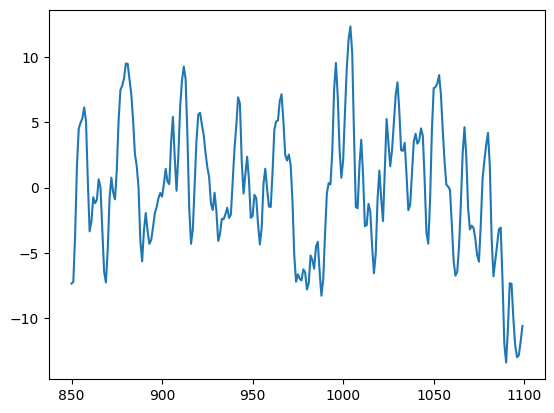

In [15]:
plt.plot(ssvep_35.iloc[1,350:600])

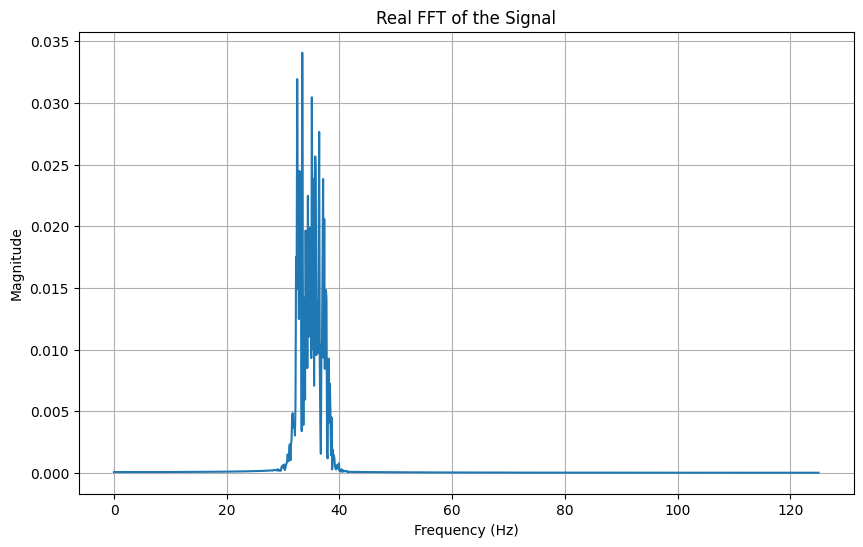

Peak frequency: 33.4
Relative amplitude difference: 155.00%


In [ ]:
signal = (ssvep_25.iloc[0,5000:5000 + 2500] + ssvep_25.iloc[1,5000:5000 + 2500] + ssvep_25.iloc[2,5000:5000 + 2500] + ssvep_25.iloc[3,5000:5000 + 2500])/4
# ssvep_15.iloc[6,:]

# Define bandpass filter parameters
lowcut = 32.0  # Lower cutoff frequency in Hz
highcut = 38.0  # Upper cutoff frequency in Hz
sampling_rate = 250  # Adjust this to your actual sampling rate

# Design the bandpass filter
nyquist = 0.5 * sampling_rate
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(4, [low, high], btype='band')

# Apply the bandpass filter
filtered_signal = filtfilt(b, a, signal)

fft_result = np.fft.rfft(filtered_signal)
fft_magnitude = np.abs(fft_result)/np.sum(np.abs(fft_result))

# Frequency values corresponding to each FFT component
sampling_rate = 250  # Adjust this to your actual sampling rate
frequency_values = np.fft.rfftfreq(len(filtered_signal), 1/sampling_rate)

peak_index = np.argmax(fft_magnitude)
peak_frequency = frequency_values[peak_index]

# Define a range around the peak index (adjust as needed)
range_around_peak = 20

# Calculate mean amplitude of the samples in the range around the peak
mean_amplitude_around_peak = np.mean(fft_magnitude[peak_index - range_around_peak : peak_index + range_around_peak])

# Calculate the relative amplitude difference
relative_amplitude_difference = (fft_magnitude[peak_index] - mean_amplitude_around_peak) / mean_amplitude_around_peak

# Plot the real FFT
plt.figure(figsize=(10, 6))
plt.plot(frequency_values, fft_magnitude)
plt.title('Real FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

print(f"Peak frequency: {peak_frequency}")
print(f"Relative amplitude difference: {relative_amplitude_difference:.2%}")


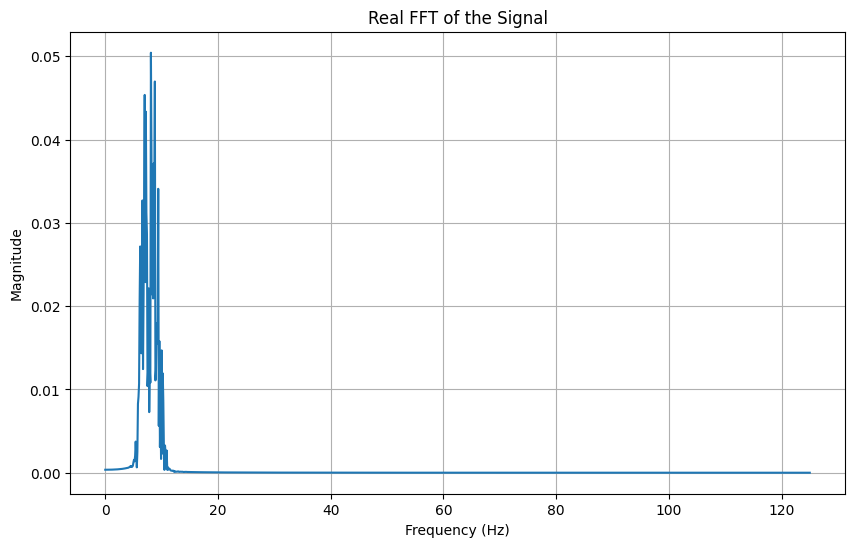

Peak frequency: 8.1
Relative amplitude difference: 129.69%


In [ ]:
signal = (ssvep_25.iloc[0,5000:7500] + ssvep_25.iloc[1,5000:7500] + ssvep_25.iloc[2,5000:7500] + ssvep_25.iloc[3,5000:7500])/4
# ssvep_15.iloc[6,:]

# Define bandpass filter parameters
lowcut = 6.0  # Lower cutoff frequency in Hz
highcut = 10.0  # Upper cutoff frequency in Hz
sampling_rate = 250  # Adjust this to your actual sampling rate

# Design the bandpass filter
nyquist = 0.5 * sampling_rate
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(4, [low, high], btype='band')

# Apply the bandpass filter
filtered_signal = filtfilt(b, a, signal)

fft_result = np.fft.rfft(filtered_signal)
fft_magnitude = np.abs(fft_result)/np.sum(np.abs(fft_result))

# Frequency values corresponding to each FFT component
sampling_rate = 250  # Adjust this to your actual sampling rate
frequency_values = np.fft.rfftfreq(len(filtered_signal), 1/sampling_rate)


peak_index = np.argmax(fft_magnitude)
peak_frequency = frequency_values[peak_index]

# Define a range around the peak index (adjust as needed)
range_around_peak = 20

# Calculate mean amplitude of the samples in the range around the peak
mean_amplitude_around_peak = np.mean(fft_magnitude[peak_index - range_around_peak : peak_index + range_around_peak])

# Calculate the relative amplitude difference
relative_amplitude_difference = (fft_magnitude[peak_index] - mean_amplitude_around_peak) / mean_amplitude_around_peak


# Plot the real FFT
plt.figure(figsize=(10, 6))
plt.plot(frequency_values, fft_magnitude)
plt.title('Real FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


print(f"Peak frequency: {peak_frequency}")
print(f"Relative amplitude difference: {relative_amplitude_difference:.2%}")


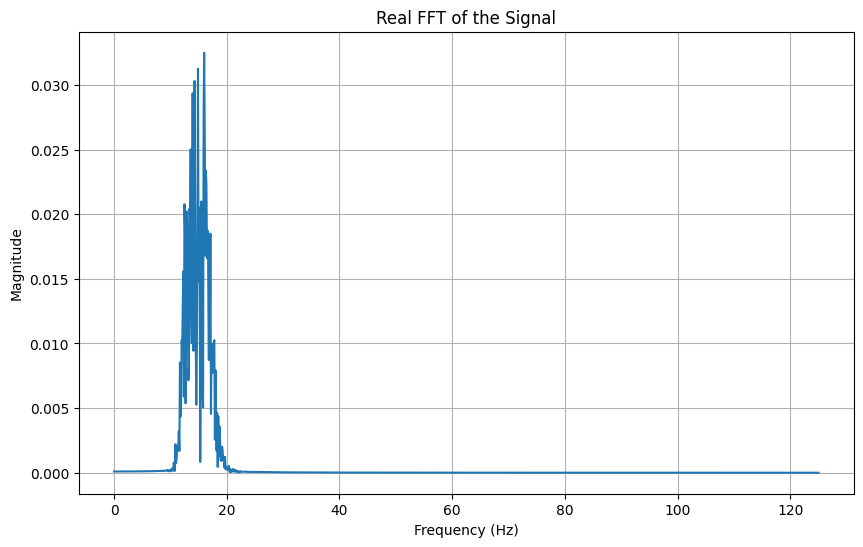

Peak frequency: 16.0
Relative amplitude difference: 118.76%


In [ ]:
signal = (ssvep_25.iloc[0,5000:7500] + ssvep_25.iloc[1,5000:7500] + ssvep_25.iloc[2,5000:7500] + ssvep_25.iloc[3,5000:7500])/4
# ssvep_15.iloc[6,:]

# Define bandpass filter parameters
lowcut = 12.0  # Lower cutoff frequency in Hz
highcut = 18.0  # Upper cutoff frequency in Hz
sampling_rate = 250  # Adjust this to your actual sampling rate

# Design the bandpass filter
nyquist = 0.5 * sampling_rate
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(4, [low, high], btype='band')

# Apply the bandpass filter
filtered_signal = filtfilt(b, a, signal)

fft_result = np.fft.rfft(filtered_signal)
fft_magnitude = np.abs(fft_result)/np.sum(np.abs(fft_result))

# Frequency values corresponding to each FFT component
sampling_rate = 250  # Adjust this to your actual sampling rate
frequency_values = np.fft.rfftfreq(len(filtered_signal), 1/sampling_rate)


peak_index = np.argmax(fft_magnitude)
peak_frequency = frequency_values[peak_index]

# Define a range around the peak index (adjust as needed)
range_around_peak = 20

# Calculate mean amplitude of the samples in the range around the peak
mean_amplitude_around_peak = np.mean(fft_magnitude[peak_index - range_around_peak : peak_index + range_around_peak])

# Calculate the relative amplitude difference
relative_amplitude_difference = (fft_magnitude[peak_index] - mean_amplitude_around_peak) / mean_amplitude_around_peak


# Plot the real FFT
plt.figure(figsize=(10, 6))
plt.plot(frequency_values, fft_magnitude)
plt.title('Real FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


print(f"Peak frequency: {peak_frequency}")
print(f"Relative amplitude difference: {relative_amplitude_difference:.2%}")


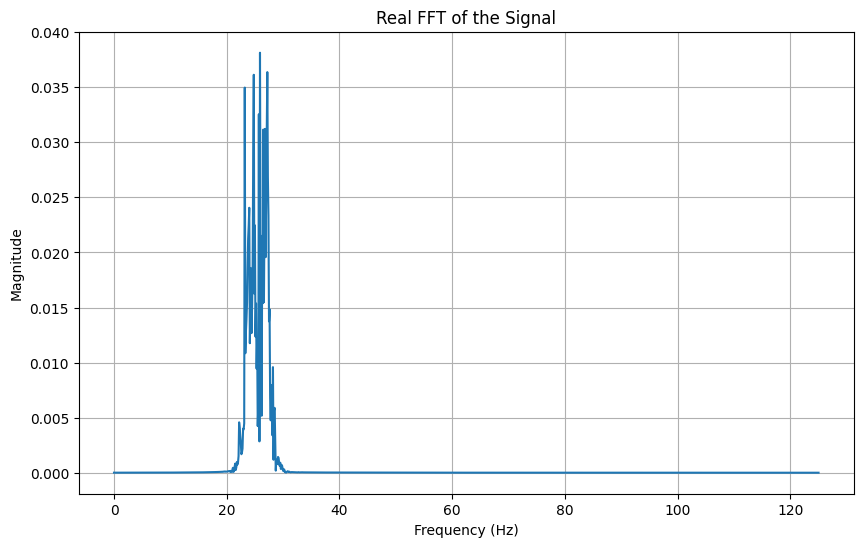

Peak frequency: 25.900000000000002
Relative amplitude difference: 101.60%


In [ ]:
signal = (ssvep_25.iloc[0,5000:7500] + ssvep_25.iloc[1,5000:7500] + ssvep_25.iloc[2,5000:7500] + ssvep_25.iloc[3,5000:7500])/4
# ssvep_15.iloc[6,:]

# Define bandpass filter parameters
lowcut = 23.0  # Lower cutoff frequency in Hz
highcut = 28.0  # Upper cutoff frequency in Hz
sampling_rate = 250  # Adjust this to your actual sampling rate

# Design the bandpass filter
nyquist = 0.5 * sampling_rate
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(4, [low, high], btype='band')

# Apply the bandpass filter
filtered_signal = filtfilt(b, a, signal)

fft_result = np.fft.rfft(filtered_signal)
fft_magnitude = np.abs(fft_result)/np.sum(np.abs(fft_result))

# Frequency values corresponding to each FFT component
sampling_rate = 250  # Adjust this to your actual sampling rate
frequency_values = np.fft.rfftfreq(len(filtered_signal), 1/sampling_rate)


peak_index = np.argmax(fft_magnitude)
peak_frequency = frequency_values[peak_index]
# Define a range around the peak index (adjust as needed)
range_around_peak = 20

# Calculate mean amplitude of the samples in the range around the peak
mean_amplitude_around_peak = np.mean(fft_magnitude[peak_index - range_around_peak : peak_index + range_around_peak])

# Calculate the relative amplitude difference
relative_amplitude_difference = (fft_magnitude[peak_index] - mean_amplitude_around_peak) / mean_amplitude_around_peak


# Plot the real FFT
plt.figure(figsize=(10, 6))
plt.plot(frequency_values, fft_magnitude)
plt.title('Real FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

print(f"Peak frequency: {peak_frequency}")
print(f"Relative amplitude difference: {relative_amplitude_difference:.2%}")
